In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.stats import norm

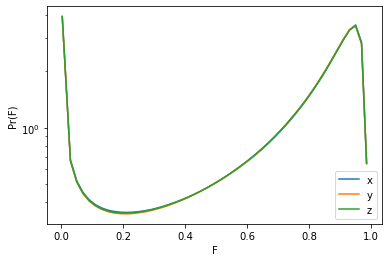

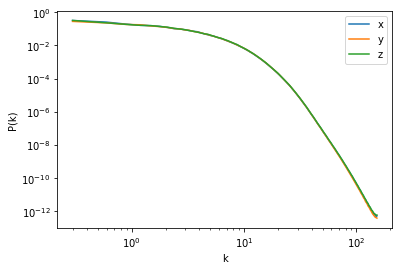

In [4]:
x_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_x_flux_pdf.txt')
y_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_y_flux_pdf.txt')
z_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_z_flux_pdf.txt')

x_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_x_flux_ps1d.txt')
y_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_y_flux_ps1d.txt')
z_1dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/lya_all_axes/out_z_flux_ps1d.txt')

fig, ax = plt.subplots()
ax.plot(x_pdf[:,2], x_pdf[:,3], label='x')
ax.plot(y_pdf[:,2], y_pdf[:,3], label='y')
ax.plot(z_pdf[:,2], z_pdf[:,3], label='z')

ax.set_xlabel('F')
ax.set_ylabel('Pr(F)')
ax.set_yscale('log')
ax.legend()
fig.show()

fig, ax = plt.subplots()
ax.plot(x_1dps[:,2], x_1dps[:,3], label='x')
ax.plot(y_1dps[:,2], y_1dps[:,3], label='y')
ax.plot(z_1dps[:,2], z_1dps[:,3], label='z')

ax.set_xlabel('k')
ax.set_ylabel('P(k)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
fig.show()

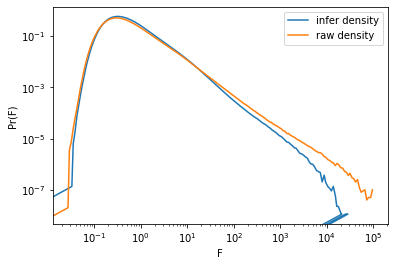

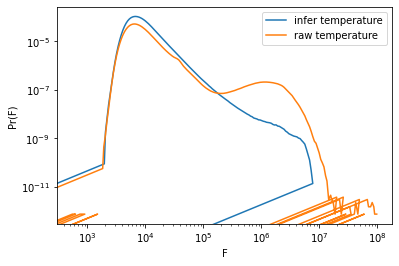

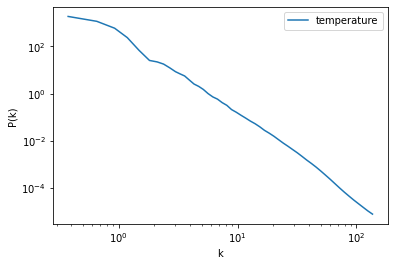

In [6]:
rho_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/next_out_rhob_pdf.txt')
raw_rho_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/raw_out_rhob_pdf.txt')
temp_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/next_out_temp_pdf.txt')
raw_temp_pdf = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/raw_out_temp_pdf.txt')

rho_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/next_out_rhob_ps3d.txt')
raw_rho_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/raw_out_rhob_ps3d.txt')
temp_3dps = np.loadtxt('/global/u1/c/cjacobus/gimlet/master/apps/sim_stats/raw_out_temp_ps3d.txt')


fig, ax = plt.subplots()
ax.plot(rho_pdf[:,2], rho_pdf[:,3], label='infer density')
ax.plot(raw_rho_pdf[:,2], raw_rho_pdf[:,3], label='raw density')

ax.set_xlabel('F')
ax.set_ylabel('Pr(F)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
fig.show()

fig, ax = plt.subplots()
ax.plot(temp_pdf[:,2], temp_pdf[:,3], label='infer temperature')
ax.plot(raw_temp_pdf[:,2], raw_temp_pdf[:,3], label='raw temperature')

ax.set_xlabel('F')
ax.set_ylabel('Pr(F)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
fig.show()


fig, ax = plt.subplots()
#ax.plot(rho_3dps[:,2], rho_3dps[:,3], label='density')
ax.plot(temp_3dps[:,2], temp_3dps[:,3], label='temperature')


ax.set_xlabel('k')
ax.set_ylabel('P(k)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend()
fig.show()


In [36]:
dtype=np.single
predict = h5py.File('/pscratch/sd/c/cjacobus/ml-pm-training-2022/logs/vanilla/4GPU/00/inference_vanilla_size_512_trim_64.h5', 'r')
pred_bar = predict['native_fields']['baryon_density'][:,:,:].astype(dtype)
#pred_vx = predict['native_fields']['velocity_x'][:,:,:].astype(dtype)
#pred_vy = predict['native_fields']['velocity_y'][:,:,:].astype(dtype)
#pred_vz = predict['native_fields']['velocity_z'][:,:,:].astype(dtype)
#pred_temp = predict['native_fields']['temperature'][:,:,:].astype(dtype)

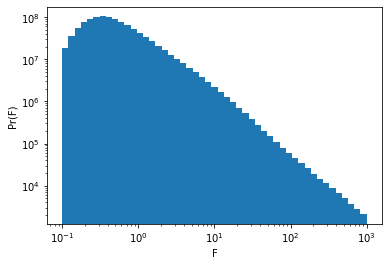

In [45]:
flat = pred_bar.flatten()
fig, ax = plt.subplots()
#ax.plot(rho_pdf[:,2], rho_pdf[:,3], label='infer density')
#ax.plot(raw_rho_pdf[:,2], raw_rho_pdf[:,3], label='raw density')

ax.hist(flat, bins=np.logspace(np.log10(0.1),np.log10(1000), 50))
#ax.plot(raw_temp_pdf[:,2], raw_temp_pdf[:,3], label='raw temperature')

ax.set_xlabel('F')
ax.set_ylabel('Pr(F)')
ax.set_yscale('log')
ax.set_xscale('log')
#ax.legend()
fig.show()
